In [1]:
import os
%pwd
os.chdir("../")
%pwd


'/home/yaswanth/Yaswanth/Machine-learning/End-To-End-Wine-Quality-Prediction'

In [4]:
import pandas as pd
DATA_PATH = "data/heart.csv"
heart_df = pd.read_csv(DATA_PATH)



In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

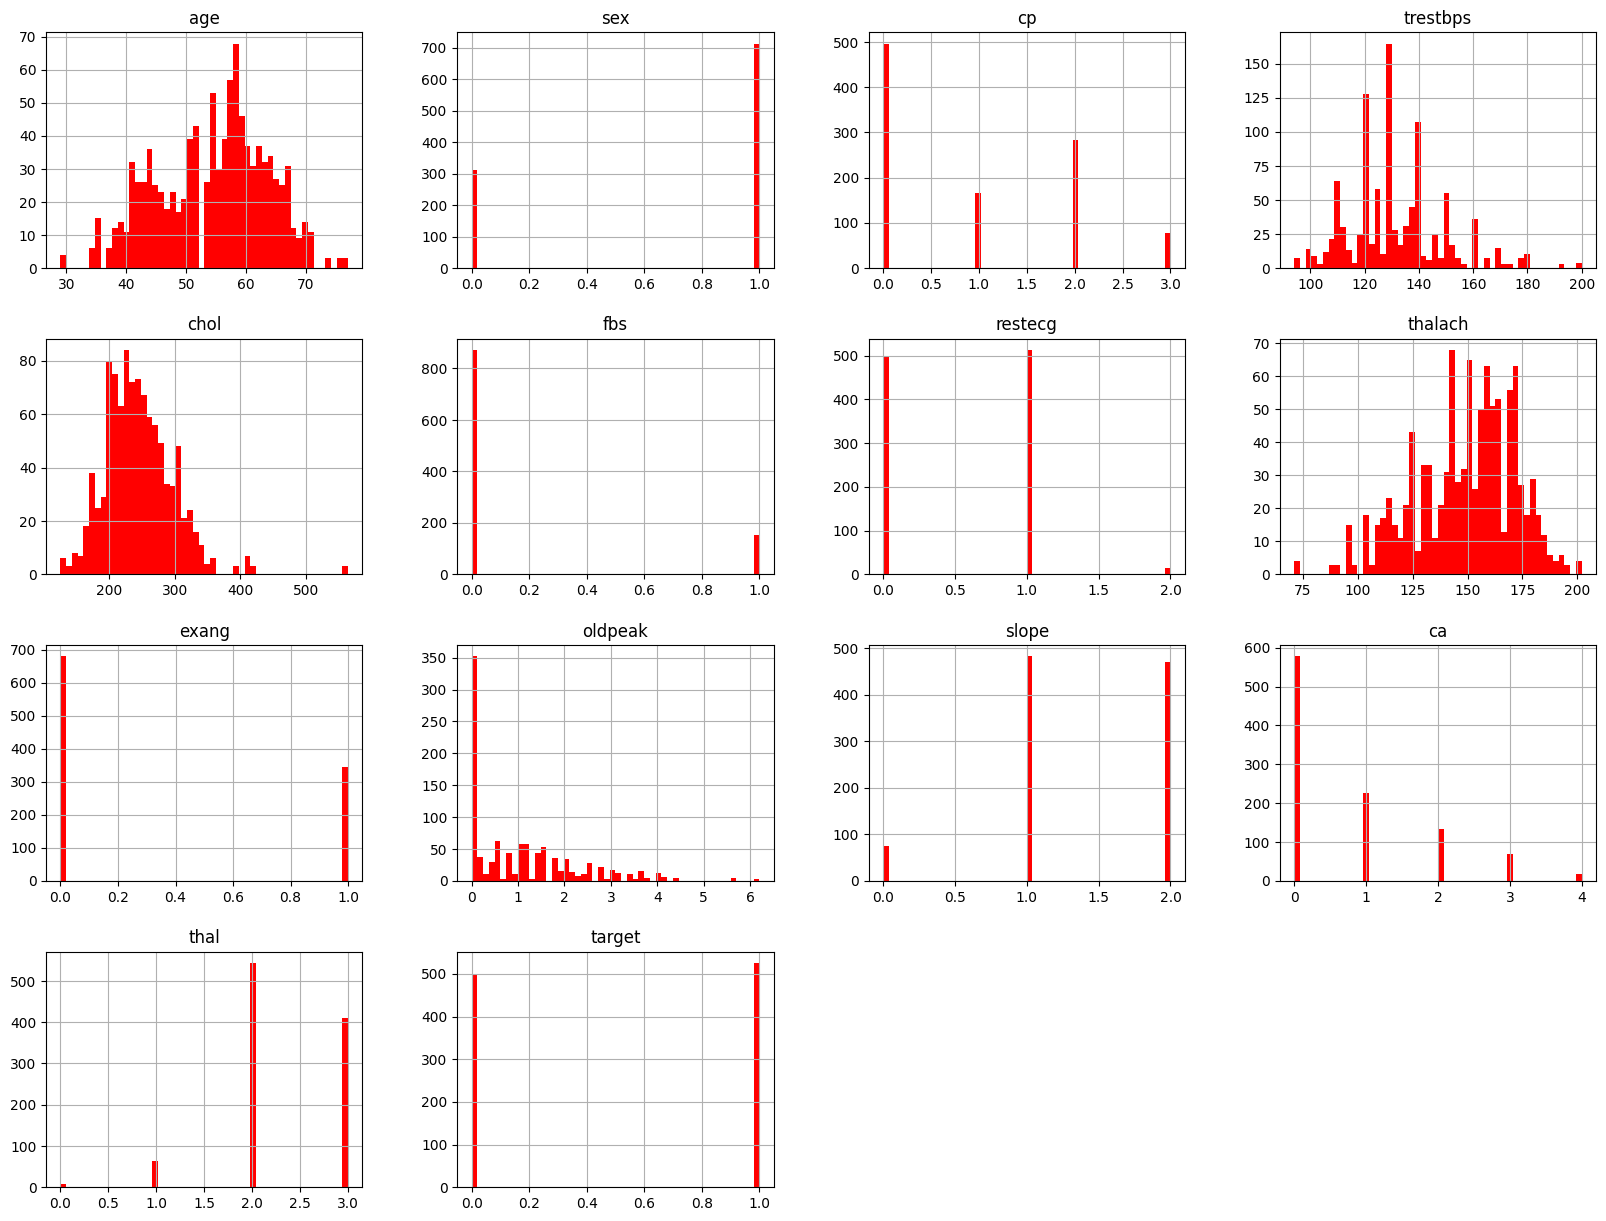

In [7]:
import matplotlib.pyplot as plt
heart_df.hist(bins=50, figsize=(20, 15), color="red")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = heart_df.drop("target", axis=1)
y = heart_df["target"]


In [10]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 13) (205, 13) (820,) (205,)


In [14]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

y_pred = elastic_net_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return rmse, mae, r2

In [16]:
predicted_qualities = elastic_net_model.predict(X_test)
(rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

print(f"Elasticnet model (alpha={0.1}, l1_ratio={0.5}):")
print(f"  RMSE: {rmse}")
print(f"  MAE: {mae}")
print(f"  R2: {r2}")

Elasticnet model (alpha=0.1, l1_ratio=0.5):
  RMSE: 0.41169823856466675
  MAE: 0.35353809545953957
  R2: 0.3220021082471537
